In [ ]:
!unzip /content/mergeAttackwithAttackFree.zip

!unzip /content/mergeIdwithAttackFree.zip


Archive:  /content/mergeAttackwithAttackFree.zip
  inflating: mergeAttackwithAttackFree.txt  
Archive:  /content/mergeIdwithAttackFree.zip
  inflating: mergeIdwithAttackFree.txt  


In [ ]:
import numpy as np


fileId = open('/content/mergeIdwithAttackFree.txt', 'r')
fileA = open('/content/mergeAttackwithAttackFree.txt','r')
detectList = []
counter = 1
graphList = []
ultimateGraphList = [] 
utlimateaDetectionList = []
graphCounter = 0


messageSize = 2000

for line in fileId:
  node = line.split()[0]


  graphList.append(node)
  

  if len(graphList) == messageSize: 
    ultimateGraphList.append(graphList)


    
  
   

    graphList = []
   
   

ugl = ultimateGraphList

for line in fileA:
  attackChecking = line.split()[0]


  detectList.append(attackChecking)
  

  if len(detectList) == messageSize: 
    utlimateaDetectionList.append(detectList)


    detectList = []

udl = utlimateaDetectionList


print(len(ugl))
print(len(udl))

print(ugl[0])
print(len(ugl[0]))
print(len(udl[0]))
print(udl[0])
print(udl[3])

8249
8249
['04b0', '05a0', '05a0', '02a0', '0260', '0080', '0081', '0165', '018f', '02b0', '0153', '0220', '0316', '0329', '0545', '043f', '0370', '0440', '0164', '04b1', '0316', '018f', '0260', '0080', '0081', '0165', '02a0', '02b0', '0329', '0153', '01f1', '0220', '0382', '0350', '04f2', '0545', '00a0', '00a1', '0370', '043f', '0440', '04f0', '05a2', '04f1', '05a2', '051a', '0690', '04b0', '0316', '018f', '0080', '0081', '0153', '0153', '0165', '0153', '0220', '0260', '02a0', '02b0', '0329', '0545', '043f', '0370', '0440', '0587', '05a0', '04b1', '0164', '0316', '0260', '02a0', '0080', '0081', '0164', '0165', '0153', '018f', '01f1', '0220', '02b0', '02c0', '0329', '0350', '0370', '0120', '0382', '0164', '043f', '0440', '04f2', '0517', '04f0', '0545', '05a2', '04b0', '0316', '0260', '018f', '0080', '0081', '0165', '0153', '01f1', '0220', '01f1', '02a0', '02b0', '0329', '0545', '043f', '0370', '0440', '0510', '04b1', '0164', '05e4', '0165', '02b0', '0080', '0081', '0153', '018f', '01f1

In [ ]:
#Making graph from the 200 sequential of id and store them in a file as Graph adjacent list
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random

gAttackfree=nx.DiGraph()
gAttacked = nx.DiGraph()

lenugl = len(ugl)

fileW = open("mixedGraph.txt","w")

counter = 0
gAttackfreeCounter = 0
gAttackedCounter = 0

isNotDone1 = True
isNotDone2 = True 
gAttackfree=nx.DiGraph()
gAttacked = nx.DiGraph()

for i in range(0,lenugl):
  fileW.write("Graph No: "+str(i+1))
  fileW.write("\n")
  dicGraph = defaultdict(list)
  attackFree = 'R'

  

  for j in range (0, len(ugl[i])-1):
    dicGraph[str(ugl[i][j])].append((ugl[i][j+1]))

  for j in range (0,len(udl[i])):
    com = str(udl[i][j])

    if com == 'S' or com == 'I' or com == 'D' or com == 'F': 
      attackFree = com
      break
    


  

  
  fileW.write("Attack Free: "+str(attackFree)+"\n")

  for key, val in dicGraph.items():
    fileW.write(str(key) + (" ---> "))
    for m in range(0, len(val)):
      fileW.write(val[m]+"\t")
    fileW.write("\n")


print(counter)
print(gAttackfreeCounter)
print(gAttackedCounter)

fileW.close()

#print(len(list(gAttackfree)))


0
0
0


In [ ]:
#Getting all the features

import networkx as nx
import hashlib
import numpy as np

#Function for tracing the attacked and attackfree graph. Return a list which 
#contation the info that a graph is attacked or attack
def getAttackFreelist(filename):
  attacFreekList = []
  file_ = open(filename, 'r')


  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        attacFreekList.append(line.split())

  
  file_.close()
  print(len(attacFreekList))
  print(attacFreekList)
  return attacFreekList


def getFeatures(filename):

  attackFreeList = getAttackFreelist(filename)
  file_ = open(filename, 'r')

  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_GraphFeatures.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
# Iterating every graph
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    graphEdgeNumber = len(ultimate_graphList[i])
     # defining variable for detecting max pagerank
  #making the graph
    indegree = 0
    outdegree = 0
    
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    

    weighted_Feature_Set = nx.pagerank(G)
    
    edge = G.number_of_edges()
    node = G.number_of_nodes()

    
    temp_list = list(weighted_Feature_Set.values())
    median_pagerank_vertices = np.median(temp_list)
    maximum_pagerank_vertex = np.max(temp_list)
    minimum_pagerank_vertex = np.min(temp_list)
    std_pagerank = np.std(temp_list)
    varpagerank = np.var(temp_list)


    if i == 0:
      file1.write("No."+"\t"+"Nodes\t"+"Edges\t"+"MaximumIndegree\t"+"MinimumIndegree\t"+"MaximumOutdegree\t"+
                  "MinimumOutdegree\t"+	
                  "MedianPagerank\t"+"MaximumPagerank\t"+"MininumPagerank\t"+"StdPageRank\t"+
                  "VarPageRank\t"+"State\n")

    file1.write(str(i+1)+"\t")
    counter = 0
    in_deg = []
    out_deg = []
    for key,val in weighted_Feature_Set.items():
      in_deg.append(G.in_degree(key))
      out_deg.append(G.out_degree(key))
    
    maxInd = np.max(in_deg)
    minInd = np.min(in_deg)
    maxOut = np.max(out_deg)
    minOut = np.min(out_deg)
    file1.write(str(node)+"\t") 
    file1.write(str(edge)+"\t")
    file1.write(str(maxInd)+str("\t")+str(minInd)+str("\t"))
    file1.write(str(maxOut)+str("\t")+str(minOut)+str("\t"))
    
    file1.write(str(median_pagerank_vertices)+str("\t")+str(maximum_pagerank_vertex))
    file1.write(str("\t")+str(minimum_pagerank_vertex)+str("\t")+str(std_pagerank)+"\t"+
                str(varpagerank)+"\t"+
                str(attackFreeList[i][2])+"\n")

  


  file1.close()
getFeatures('/content/mixedGraph.txt')



8249
[['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Attack', 'Free:', 'R'], ['Atta

In [ ]:
#Applying the GNB and getting the accuracy and confusion matrix

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
dataframe = pandas.read_table('/content/mixedGraph_GraphFeatures.txt')

data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)
dataset = data.values



# split into input (X) and output (Y) variables


l = len(ugl)

X = dataset[:,0:]
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'R':
    labels.append(0)
  elif X[i][9] == 'I':
    labels.append(1)
  elif X[i][9] == 'D':
    labels.append(2)
  elif X[i][9] == 'S':
    labels.append(3)
  elif X[i][9] == 'F':
    labels.append(4)

features = X[0:l,0:9]
print("Attacked--I----"+str(labels.count(1)))
print("Attacked---D-->"+str(labels.count(2)))
print("Attacked---S---"+str(labels.count(3)))
print("Attacked--F--->"+str(labels.count(4)))

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
gnb = GaussianNB()

  # Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
print("........Belows are for the test cases-----------")
print("Attackfree in test-->"+str(test_labels.count(0)))
print("I in test-->"+str(test_labels.count(1)))
print("D in test-->"+str(test_labels.count(2)))
print("S in test--->"+str(test_labels.count(3)))
print("F in test ---->"+str(test_labels.count(4)))

  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))

cm = confusion_matrix(test_labels, preds)

cm = cm.T

print(cm)

target_names = ["Attack free", "Replay attacks", "DoS attacks", "Spoofing attacks", "Fuzzy attacks"]

print('classification report')

print(classification_report(test_labels, preds, target_names=target_names))



       No.  Nodes  Edges  ...  StdPageRank  VarPageRank  State
0        1     44    316  ...     0.014907     0.000222      R
1        2     45    342  ...     0.016145     0.000261      R
2        3     45    338  ...     0.016005     0.000256      R
3        4     42    326  ...     0.014574     0.000212      R
4        5     45    309  ...     0.016327     0.000267      R
...    ...    ...    ...  ...          ...          ...    ...
8244  8245     27     87  ...     0.015936     0.000254      R
8245  8246     27     69  ...     0.019093     0.000365      R
8246  8247     27     92  ...     0.021017     0.000442      R
8247  8248     27    104  ...     0.017741     0.000315      R
8248  8249     27     79  ...     0.021960     0.000482      R

[8249 rows x 13 columns]
Attacked--I----67
Attacked---D-->848
Attacked---S---1324
Attacked--F--->960
........Belows are for the test cases-----------
Attackfree in test-->1673
I in test-->23
D in test-->281
S in test--->437
F in test ---->309


In [ ]:


0.9342636797649652
[[1576    0    6   17    5]
 [  94   23    0    0    0]
 [   0    0  240   19    0]
 [   2    0   35  401    0]
 [   1    0    0    0  304]]
 2k messages


Attacked--I----133
Attacked---D-->1385
Attacked---S---2347
Attacked--F--->1585
........Belows are for the test cases-----------
Attackfree in test-->3640
I in test-->41
D in test-->449
S in test--->793
F in test ---->522
0.9447199265381083
[[3444    0    7   17    7]
 [ 184   41    0    0    0]
 [   0    0  388   20    0]
 [   1    0   54  756    0]
 [  11    0    0    0  515]]
 1k



Attacked--I----266
Attacked---D-->2453
Attacked---S---4418
Attacked--F--->2865
........Belows are for the test cases-----------
Attackfree in test-->7590
I in test-->79
D in test-->813
S in test--->1465
F in test ---->943
0.9558310376492195
[[7231    0    8   15   10]
 [ 335   79    0    0    1]
 [   1    0  725    8    0]
 [   9    0   80 1442    0]
 [  14    0    0    0  932]]
 500




Attacked--I----664
Attacked---D-->5685
Attacked---S---10606
Attacked--F--->6708
........Belows are for the test cases-----------
Attackfree in test-->19530
I in test-->238
D in test-->1785
S in test--->3503
F in test ---->2169
0.9579797979797979
[[18577     0    20    16    16]
 [  885   238     0     0    18]
 [    4     0  1700    56     0]
 [   26     0    64  3431     0]
 [   38     0     1     0  2135]]
 200



 Attacked--I----1328
Attacked---D-->11069
Attacked---S---20907
Attacked--F--->13116
........Belows are for the test cases-----------
Attackfree in test-->39185
I in test-->436
D in test-->3652
S in test--->6898
F in test ---->4278
0.9608808242575622
[[37430     8    30    23    27]
 [ 1726   427     5     2    58]
 [    0     0  3497   101     0]
 [   28     0   120  6772     0]
 [    1     1     0     0  4193]]
 100

In [ ]:
import numpy as np

from sklearn.metrics import classification_report

cm=[[18577   ,  0,    20  ,  16 ,   16],
 [  885   ,238  ,   0    , 0   , 18],
 [    4    , 0  ,1700,    56,     0],
 [   26     ,0    ,64  ,3431   ,  0],
 [   38     ,0,     1,     0,  2135]]





aFree,Iattack,Dattack,Sattack,Fattack = 0,0,0,0,0

for i in range(len(cm)):
  aFree += cm[i][0]
  Iattack += cm[i][1]
  Dattack += cm[i][2]
  Sattack += cm[i][3]
  Fattack += cm[i][4]


print('attackfree')
print(cm[0][0]/aFree)
print('Impersionattack')
print(cm[1][1]/Iattack)
print('dos attack')
print(cm[2][2]/Dattack)
print('sppfoing')
print(cm[3][3]/Sattack)
print('fuzzy')
print(cm[4][4]/Fattack)






attackfree
0.9527009222661397
Impersionattack
1.0
dos attack
0.8917589175891759
sppfoing
0.9843003412969283
fuzzy
0.9883351007423118


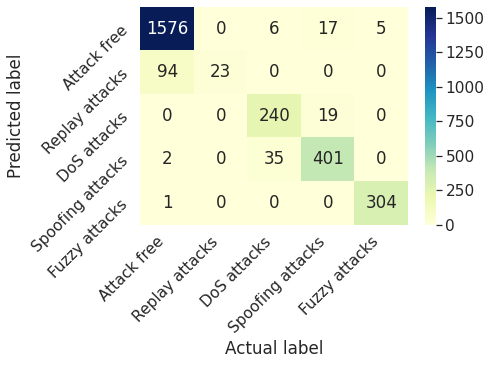

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



cm =[[1576 ,   0,    6 ,  17,    5],
 [  94 ,  23   , 0   , 0   , 0],
 [   0  ,  0  ,240  , 19 ,   0],
 [   2   , 0 ,  35 , 401  ,  0],
 [   1   , 0,    0  ,  0,  304]]


cm_matrix = pd.DataFrame(data=cm, columns=["Attack free", "Replay attacks", "DoS attacks", "Spoofing attacks", "Fuzzy attacks"], 
                                 index=["Attack free", "Replay attacks", "DoS attacks", "Spoofing attacks", "Fuzzy attacks"])
sns.set(font_scale=1.40)
sns.heatmap(cm_matrix, annot=True, fmt= 'g', cmap='YlGnBu')
plt.rcParams['font.size'] = 3
plt.rcParams['figure.figsize'] = (3, 3)  
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45, ha = 'right')
 
plt.savefig('confusion_2k.pdf', bbox_inches = "tight")
plt.savefig('confusion_2k.svg', bbox_inches = "tight")
plt.savefig('confusion_2k.png', bbox_inches = "tight")